In [ ]:
from keras.datasets import imdb
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17464789/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [ ]:
print('---review---')
print(X_train)
print('---label---')
print(y_train[6])

---review---
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

1641221/1641221 [==============================] - 1s 1us/step
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'm

In [ ]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
390/390 [==============================] - 28s 73ms/step - loss: 0.3030 - accuracy: 0.8762 - val_loss: 0.2457 - val_accuracy: 0.8750
Epoch 2/3
390/390 [==============================] - 18s 46ms/step - loss: 0.2502 - accuracy: 0.9006 - val_loss: 0.2409 - val_accuracy: 0.8906
Epoch 3/3
390/390 [==============================] - 15s 38ms/step - loss: 0.2096 - accuracy: 0.9181 - val_loss: 0.2040 - val_accuracy: 0.9375


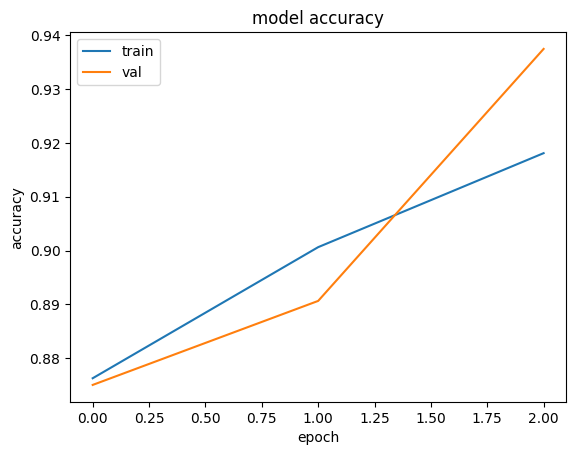

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

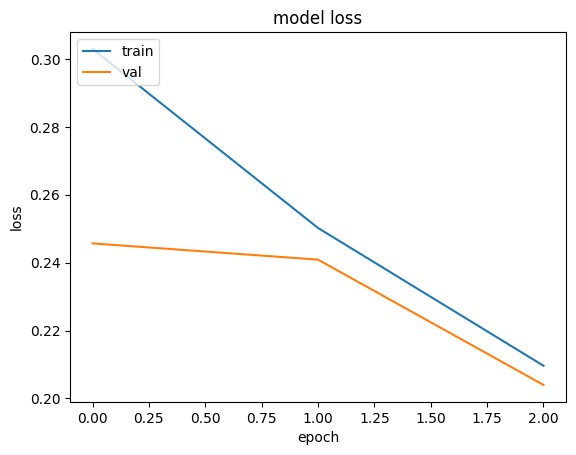

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8674399852752686


In [ ]:
import os
os.chdir('drive/MyDrive/cs580')


In [ ]:
!ls

dev_sent_emo.csv  test_sent_emo.csv  train_sent_emo.csv


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



# Replace this with your actual data loading code
# Assuming you have a list 'sentences' containing input sentences and 'labels' containing corresponding labels
# Make sure labels are encoded as integers (e.g., 0, 1, 2 for three classes)

# Example data loading (replace this with your actual data loading code)
def prepare_set(csvfile):
  train_set = pd.read_csv(csvfile)
  utterance_train = train_set.Utterance.values.tolist()
  sentiment_train = train_set.Sentiment.values.tolist()
  for i in range(len(utterance_train)):
    utterance_train[i] = utterance_train[i].replace('\x92',"'")
    utterance_train[i] = utterance_train[i].replace('\x85',"...")
    utterance_train[i] = utterance_train[i].replace('\x91',"'")
    utterance_train[i] = utterance_train[i].replace('\x93',"\"")
    utterance_train[i] = utterance_train[i].replace('\x94',"\"")
    utterance_train[i] = utterance_train[i].replace('\x96',"-")
    utterance_train[i] = utterance_train[i].replace('\x97',"-")




  print(utterance_train)
  label_dict = {"positive":0,"negative":1,"neutral":2}

  labels = [label_dict[i] for i in sentiment_train]
  print(labels)
  return utterance_train,labels

train_set,train_labels = prepare_set('train_sent_emo.csv')
val_set,val_labels = prepare_set('dev_sent_emo.csv')
test_set,test_labels = prepare_set('test_sent_emo.csv')
print(len(train_set))


["also I was the point person on my company's transition from the KL-5 to GR-6 system.", "You must've had your hands full.", 'That I did. That I did.', "So let's talk a little bit about your duties.", 'My duties?  All right.', "Now you'll be heading a whole division, so you'll have a lot of duties.", 'I see.', "But there'll be perhaps 30 people under you so you can dump a certain amount on them.", 'Good to know.', 'We can go into detail', "No don't I beg of you!", "All right then, we'll have a definite answer for you on Monday, but I think I can say with some confidence, you'll fit in well here.", 'Really?!', 'Absolutely.  You can relax', 'But then who? The waitress I went out with last month?', 'You know? Forget it!', 'No-no-no-no, no! Who, who were you talking about?', "No, I-I-I-I don't, I actually don't know", 'Ok!', 'All right, well...', 'Yeah, sure!', 'Hey, Mon.', 'Hey-hey-hey. You wanna hear something that sucks.', 'Do I ever.', "Chris says they're closing down the bar.", 'No wa

In [ ]:
import re
def remove_tags(str):
  #s = "string. With. Punctuation?"
  result = re.sub(r'[^\w\s]','',str)
  return result

for i in range(len(train_set)):
  train_set[i] = remove_tags(train_set[i])

for i in range(len(val_set)):
  val_set[i] = remove_tags(val_set[i])

for i in range(len(test_set)):
  test_set[i] = remove_tags(test_set[i])

print(train_set)

['also I was the point person on my companys transition from the KL5 to GR6 system', 'You mustve had your hands full', 'That I did That I did', 'So lets talk a little bit about your duties', 'My duties  All right', 'Now youll be heading a whole division so youll have a lot of duties', 'I see', 'But therell be perhaps 30 people under you so you can dump a certain amount on them', 'Good to know', 'We can go into detail', 'No dont I beg of you', 'All right then well have a definite answer for you on Monday but I think I can say with some confidence youll fit in well here', 'Really', 'Absolutely  You can relax', 'But then who The waitress I went out with last month', 'You know Forget it', 'Nononono no Who who were you talking about', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something that sucks', 'Do I ever', 'Chris says theyre closing down the bar', 'No way', 'Yeah apparently theyre turning it into some kinda coffee pla

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(train_set)):
  x = train_set[i]
  sennow = ""
  for word in x.split():
    if word not in (stop_words):
      if sennow == "":
        sennow += word
      else:
        sennow += " " + word
  train_set[i] = sennow

for i in range(len(val_set)):
  x = val_set[i]
  sennow = ""
  for word in x.split():
    if word not in (stop_words):
      if sennow == "":
        sennow += word
      else:
        sennow += " " + word
  val_set[i] = sennow

for i in range(len(test_set)):
  x = test_set[i]
  sennow = ""
  for word in x.split():
    if word not in (stop_words):
      if sennow == "":
        sennow += word
      else:
        sennow += " " + word
  test_set[i] = sennow




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(train_set)
print(val_set)
print(test_set)

['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
def getmax():
  totalset = train_set+val_set+test_set
  maxsentence = 0
  for i in range(len(totalset)):
    sentencelen = len(totalset[i])
    if sentencelen > maxsentence:
      maxsentence = sentencelen
  return sentencelen

print(getmax())

17


In [ ]:
all_words = []

for eachsentence in train_set:
  words = eachsentence.split()
  all_words.append(words)

for eachsentence in val_set:
  words = eachsentence.split()
  all_words.append(words)

for eachsentence in test_set:
  words = eachsentence.split()
  all_words.append(words)

print(all_words)

[['also', 'I', 'point', 'person', 'companys', 'transition', 'KL5', 'GR6', 'system'], ['You', 'mustve', 'hands', 'full'], ['That', 'I', 'That', 'I'], ['So', 'lets', 'talk', 'little', 'bit', 'duties'], ['My', 'duties', 'All', 'right'], ['Now', 'youll', 'heading', 'whole', 'division', 'youll', 'lot', 'duties'], ['I', 'see'], ['But', 'therell', 'perhaps', '30', 'people', 'dump', 'certain', 'amount'], ['Good', 'know'], ['We', 'go', 'detail'], ['No', 'dont', 'I', 'beg'], ['All', 'right', 'well', 'definite', 'answer', 'Monday', 'I', 'think', 'I', 'say', 'confidence', 'youll', 'fit', 'well'], ['Really'], ['Absolutely', 'You', 'relax'], ['But', 'The', 'waitress', 'I', 'went', 'last', 'month'], ['You', 'know', 'Forget'], ['Nononono', 'Who', 'talking'], ['No', 'IIII', 'dont', 'I', 'actually', 'dont', 'know'], ['Ok'], ['All', 'right', 'well'], ['Yeah', 'sure'], ['Hey', 'Mon'], ['Heyheyhey', 'You', 'wanna', 'hear', 'something', 'sucks'], ['Do', 'I', 'ever'], ['Chris', 'says', 'theyre', 'closing', '

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=32, input_length=maxwords),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.SimpleRNN(100,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
model = lstm_model(20)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#DONT USE

# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),callbacks=callback)
model.save("model_RNN_word2vec.h5")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_rnn.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_RNN_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_rnn.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

Epoch 1/150
313/313 [==============================] - 17s 48ms/step - loss: 2.1747 - accuracy: 0.4286 - val_loss: 2.0191 - val_accuracy: 0.4238
Epoch 2/150
313/313 [==============================] - 8s 26ms/step - loss: 1.8947 - accuracy: 0.4587 - val_loss: 1.7854 - val_accuracy: 0.4238
Epoch 3/150
313/313 [==============================] - 9s 30ms/step - loss: 1.6844 - accuracy: 0.4689 - val_loss: 1.6017 - val_accuracy: 0.4238
Epoch 4/150
313/313 [==============================] - 8s 27ms/step - loss: 1.5208 - accuracy: 0.4700 - val_loss: 1.4604 - val_accuracy: 0.4238
Epoch 5/150
313/313 [==============================] - 8s 26ms/step - loss: 1.3941 - accuracy: 0.4711 - val_loss: 1.3527 - val_accuracy: 0.4238
Epoch 6/150
313/313 [==============================] - 10s 31ms/step - loss: 1.2988 - accuracy: 0.4713 - val_loss: 1.2738 - val_accuracy: 0.4238
Epoch 7/150
313/313 [==============================] - 7s 22ms/step - loss: 1.2295 - accuracy: 0.4715 - val_loss: 1.2177 - val_accurac

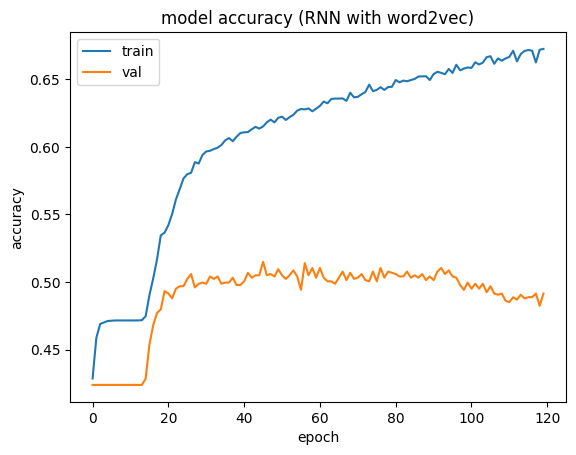

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:120])
plt.plot(history.history['val_accuracy'][:120])
plt.title('model accuracy (RNN with word2vec)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

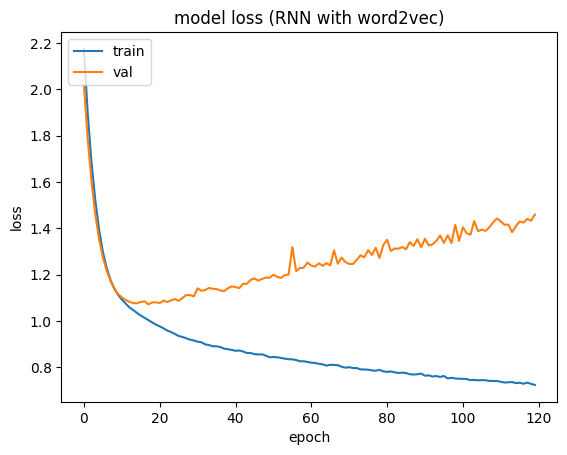

In [ ]:
plt.plot(history.history['loss'][:120])
plt.plot(history.history['val_loss'][:120])
plt.title('model loss (RNN with word2vec)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rnnhistory = history
rnnmodel = model

LSTM

In [ ]:
import tensorflow as tf
import keras
from keras import layers,Sequential

def lstm_model(max_words):
  embedding_size=32
  model=Sequential()
  model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=max_words))
  model.add(LSTM(100))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
maxwords = 7000
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_set)
total_words = len(tokenizer.word_index) + 1

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)

# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train),maxwords)
padded_val = np.array(pad_sequences(sequences_val),maxwords)
padded_test = np.array(pad_sequences(sequences_test),maxwords)

X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# LSTM
print(len(X_train[0]))
model = lstm_model(X_train[0][0])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')
print(roc_auc)

69


NameError: ignored

LSTM

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=32, input_length=maxwords),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(100,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_lstm.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_LSTM_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_lstm.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

Epoch 1/150
313/313 [==============================] - 17s 44ms/step - loss: 2.1089 - accuracy: 0.4474 - val_loss: 1.8154 - val_accuracy: 0.4238
Epoch 2/150
313/313 [==============================] - 3s 9ms/step - loss: 1.6260 - accuracy: 0.4714 - val_loss: 1.4824 - val_accuracy: 0.4238
Epoch 3/150
313/313 [==============================] - 3s 9ms/step - loss: 1.3729 - accuracy: 0.4715 - val_loss: 1.3008 - val_accuracy: 0.4238
Epoch 4/150
313/313 [==============================] - 2s 7ms/step - loss: 1.2367 - accuracy: 0.4715 - val_loss: 1.2014 - val_accuracy: 0.4238
Epoch 5/150
313/313 [==============================] - 3s 10ms/step - loss: 1.1604 - accuracy: 0.4715 - val_loss: 1.1461 - val_accuracy: 0.4238
Epoch 6/150
313/313 [==============================] - 3s 9ms/step - loss: 1.1178 - accuracy: 0.4715 - val_loss: 1.1153 - val_accuracy: 0.4238
Epoch 7/150
313/313 [==============================] - 2s 7ms/step - loss: 1.0932 - accuracy: 0.4715 - val_loss: 1.0978 - val_accuracy: 0.4

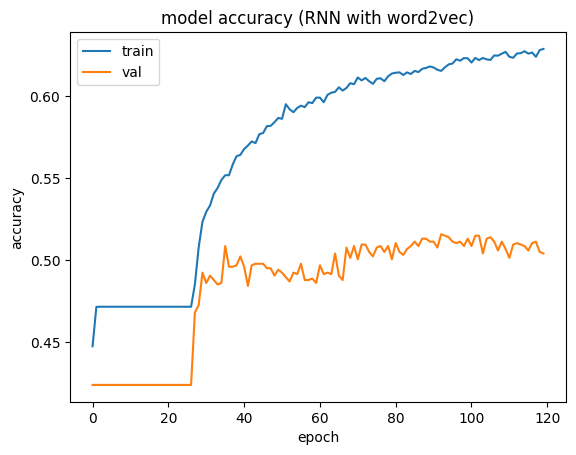

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:120])
plt.plot(history.history['val_accuracy'][:120])
plt.title('model accuracy (RNN with word2vec)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

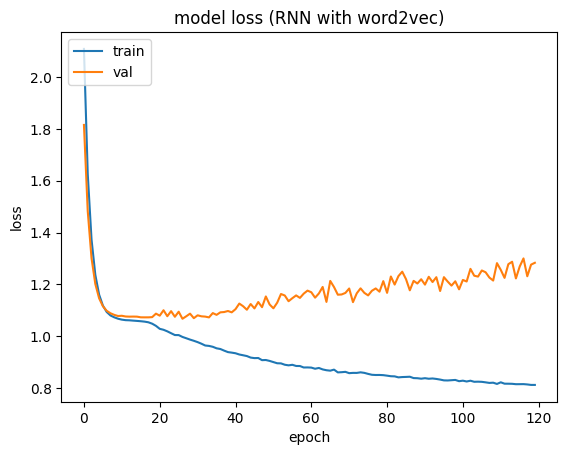

In [ ]:
plt.plot(history.history['loss'][:120])
plt.plot(history.history['val_loss'][:120])
plt.title('model loss (RNN with word2vec)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Bi-LSTM with Attention

In [ ]:
from tensorflow.keras.layers import Layer
from keras import initializers, regularizers, constraints
class Attention(Layer):
    """
    Keras Layer that implements an Attention mechanism for temporal data.
    Supports Masking.
    Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    :param kwargs:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(Attention())
    """
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
attention_layer = tf.keras.layers.Attention(10)
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=32, input_length=maxwords),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100,kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    Attention(20)(total_words),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_att_bilstm.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_att_biLSTM_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_att_bilstm.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

In [ ]:
!pip3 install keras_self_attention

CNN

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
attention_layer = tf.keras.layers.Attention(10)
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=maxwords),
    tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])



# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=120, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_CNN_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_cnn.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

Epoch 1/120
313/313 [==============================] - 14s 32ms/step - loss: 1.4174 - accuracy: 0.4397 - val_loss: 1.2977 - val_accuracy: 0.4238
Epoch 2/120
313/313 [==============================] - 2s 7ms/step - loss: 1.2242 - accuracy: 0.4667 - val_loss: 1.1794 - val_accuracy: 0.4238
Epoch 3/120
313/313 [==============================] - 2s 7ms/step - loss: 1.1407 - accuracy: 0.4701 - val_loss: 1.1280 - val_accuracy: 0.4238
Epoch 4/120
313/313 [==============================] - 3s 9ms/step - loss: 1.1041 - accuracy: 0.4712 - val_loss: 1.1022 - val_accuracy: 0.4238
Epoch 5/120
313/313 [==============================] - 2s 8ms/step - loss: 1.0838 - accuracy: 0.4714 - val_loss: 1.0901 - val_accuracy: 0.4238
Epoch 6/120
313/313 [==============================] - 2s 7ms/step - loss: 1.0745 - accuracy: 0.4715 - val_loss: 1.0829 - val_accuracy: 0.4238
Epoch 7/120
313/313 [==============================] - 2s 5ms/step - loss: 1.0692 - accuracy: 0.4716 - val_loss: 1.0777 - val_accuracy: 0.42

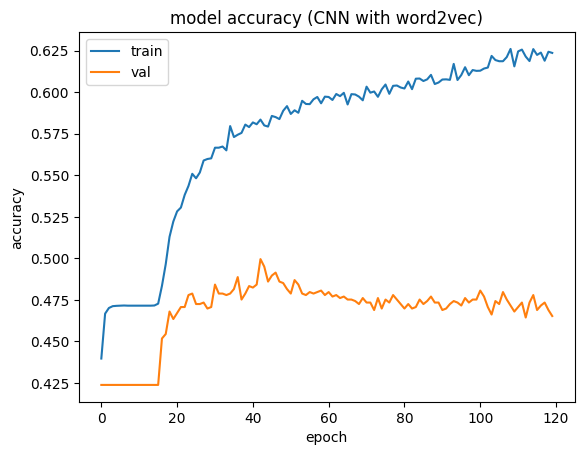

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:120])
plt.plot(history.history['val_accuracy'][:120])
plt.title('model accuracy (CNN with word2vec)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

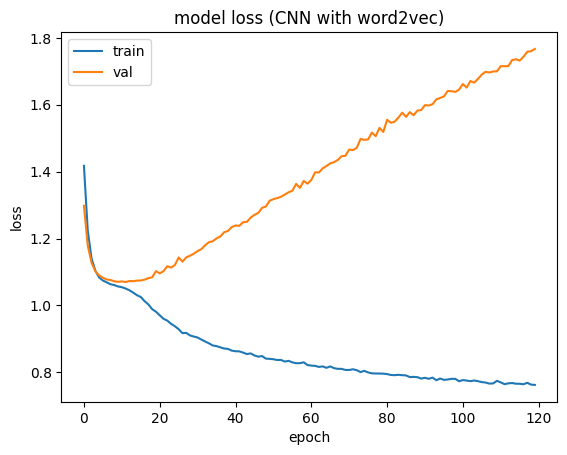

In [ ]:
plt.plot(history.history['loss'][:120])
plt.plot(history.history['val_loss'][:120])
plt.title('model loss (CNN with word2vec)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KNN

In [ ]:
print(val_set)
print(val_labels)

['Oh God hes lost Hes totally lost', 'What', 'Or Or could go bank close accounts cut source', 'Youre genius', 'Aww man wont bank buddies', 'Now theres two reasons', 'Hey', 'Hey', 'Ohh guys remember cute client I told I bit', 'Where', 'On touchy', 'And', 'No I know', 'IIm sorry moment I touch I wanna throw old oath take new dirty one', 'Well next time massaging try distract', 'Yeah Yeah Yeah Likelike Im something exciting I dont wanna get', 'Thank Joey', 'Nono thank', 'Hey Estelle listen', 'Well Well Well Joey Tribbiani So came back huh They', 'What talkin I never left Youve always agent', 'Really', 'Yeah', 'Oh well harm foul', 'Okay guys free tonight', 'Yeah', 'Tonight Youyou didnt say going nighttime', 'Yes Yes How I help', 'Yeah werewe looking around', 'Ohoh youreyoure fellow scholars', 'What exactly looking hmm', 'Perhaps perhaps Dr Chester Stocks musings Smiledon Californicus', 'Uhh', 'Ah AhGet Uh meeting someone Oror brush Marions views evolution', 'Uh actually I find Marions view

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample data (replace with your actual data)
#texts = ["I love this product!", "Not satisfied with the service.", "Amazing experience!", "Disappointed with the quality.","of course not","are you nuts"]
#labels = ["positive", "negative", "positive", "neutral","neutral","negative"]

# Convert labels to numerical values
#label_mapping = {"positive": 0, "negative": 1,"neutral":2}
#y = np.array([label_mapping[label] for label in labels])

# Split the data into training, validation, and testing sets
#X_train, X_temp, y_train, y_temp = train_test_split(texts, y, test_size=0.4, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = train_set
y_train = train_labels

X_val = val_set
y_val = val_labels

X_test = test_set
y_test = test_labels



# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Lists to store training and validation loss and accuracy
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
epochs = 5
# Training loop

knn_classifier.fit(X_train_tfidf, y_train)

# Evaluate on training set
y_train_pred = knn_classifier.predict(X_train_tfidf)
train_acc = accuracy_score(y_train, y_train_pred)
#train_accuracy.append(train_acc)

# Evaluate on validation set
y_test_pred = knn_classifier.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_test_pred)
test_accuracy.append(test_acc)


# Plotting the training and validation accuracy
plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-149-5380acabecfb>", line 58, in <cell line: 58>
    test_accuracy.append(test_acc)
NameError: name 'test_accuracy' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packa